# Biomedical Image Analysis in Python
The field of biomedical imaging has exploded in recent years - but for the uninitiated, even loading data can be a challenge! In this introductory course, you'll learn the fundamentals of image analysis using NumPy, SciPy, and Matplotlib. You'll navigate through a whole-body CT scan, segment a cardiac MRI time series, and determine whether Alzheimer’s disease changes brain structure. Even if you have never worked with images before, you will finish the course with a solid toolkit for entering this dynamic field.

**Instructor:** Stephen Bailey is lead data scientist at Immuta, where he researches and develops best practices in data governance. He is passionate about democratizing science and is an enthusiastic member of the Python community. Stephen has published a number of papers on leveraging medical imaging technology to better understand health and disease, and he is excited to introduce others to this dynamic research field!

![Axial CT gif](https://goodboychan.github.io/images/copied_from_nb/image/Ch1_L3_Axial16x9.gif "Axial")

# $\star$ Chapter 1: Exploration
Prepare to conquer the Nth dimension! To begin the course, you'll learn how to load, build and navigate N-dimensional images using a CT image of the human chest. You'll also leverage the useful ImageIO package and hone your NumPy and matplotlib skills.

### Image data
   Since the first X-ray in 1895, medical imaging technology has advanced clinical care and opened up new fields of scientific investigation. The amount of imaging data is exploding: by 2020, there is estimated to be more than 3.5 billion terabytes of imaging data in the U.S. alone. This has created amazing opportunities for analysis: 
   * Measuring organ shape and size
   * Creating detailed reconstructions of anatomy
   * Analyzing tissue composition
   * Predicting pathology
   * Much, much more...
   The complexity and variety of the data can make it an intimidating field to jump into. Fortunately, there are fantastic tools and a wealth of resources to support you. 
  
#### Toolbox
* `ImageIO`
* `NumPy`
* `SciPy`
* `matplotlib`

#### Course Objectives

* **1) Exploration**
    * Loading images
    * N-D data
    * Subplots
    
* **2) Masks and Filters**
    * Intensity distributions
    * Convolutions
    * Edge detection
    
* **3) Measurement**
    * Labelling
    * Multi-object measurement
    * Morphology
    
* **4) Image Comparison**
    * Transformations
    * Resampling
    * Cost functions
    * Normalization
    
* While this only scratches the surface of the field, it will give you a firm foundation for advanced concepts like classification and segmentation.

### Loading images

#### `imageio`
* read and save images with `imread`

```
import imagio
im = imagio.imread('body-001.dcm')
```
   * One useful feature of `imageio` is that it can read **DICOM files, the standard format for human medical imaging.**
   * See here for more information on [DICOM images](https://en.wikipedia.org/wiki/DICOM)
   * The data is read in as an **image object**, which is a type of NumPy array.
* To access specific values from your image, you can slice out a single value or a range of index values along each dimension
    * Slice the array by specifying values along each available dimension
    
```
im[0, 0]
im[0:2, 0:2]
```

### Metadata
* Images are always acquired in a specific context; this information is often referred to as **metadata**.
* **Metadata:** the who, what, when, where, and how of image acquisition
* `imagio` loads available metadata into a dictionary, accessible through the `meta` attribute
* **`image.meta`**
* This is especially important for **DICOM** files, which contain a lot of patient and acquisition information
* Since `meta` is a Python dictionary, you can access specific information by indexing it with one of the available keys.
* **You can also call the `keys()` method to list all of the available metadata.**
    * `image.meta.keys()`
    
#### Plotting images
* Visualization is fundamental to image analysis, and we'll rely heavily on matplotlib and its `imshow()` function throughout this course.


In [129]:
import numpy as np
import scipy
import imageio
from imageio import imread
import matplotlib.pyplot as plt
from pprint import pprint
import scipy.ndimage as ndi
from skimage.color import rgb2gray, rgba2rgb

plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
def plot_comparison(original, original_title, filtered, title_filtered):
    
    fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize=(12, 8), sharex= True, sharey= True)
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title(original_title)
    ax1.axis('off')
    ax2.imshow(filtered, cmap= plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

In [4]:
def format_and_render_plot_1():
    '''Custom function to simplify common formatting operations for exercises. Operations include: 
    1. Turning off axis grids.
    2. Calling `plt.tight_layout` to improve subplot spacing.
    3. Calling `plt.show()` to render plot.'''
    fig = plt.gcf()
    for ax in fig.axes:
        ax.axis('off')    
    plt.tight_layout()
    plt.show()

In [5]:
def format_and_render_plot_2():
    '''Custom function to simplify common formatting operations for exercises. Operations include: 
    1. Turning off axis grids.
    2. Calling `plt.tight_layout` to improve subplot spacing.
    3. Calling `plt.show()` to render plot.'''
    fig = plt.gcf()
    for ax in fig.axes:
        ax.legend(loc='center right')
    plt.show()

* `plt.imshow(im, cmap='gray')
* If the image does not have color, add `cmap='gray'` to plot it in grayscale
* Many colormaps available but often shown in grayscale (`cmap='gray')
* **To reduce clutter, it's common to turn off the axis ticks, labels, and frame with `plt.axis('off')`**
* Finally, call `plt.show()` per usual to render the image. 

#### Loading Images Exercises
In this chapter, we'll work with sections of a [computed tomography (CT) scan](https://en.wikipedia.org/wiki/CT_scan) from [The Cancer Imaging Archive](https://www.cancerimagingarchive.net/about-the-cancer-imaging-archive-tcia/) . CT uses a rotating X-ray tube to create a 3D image of the target area.

The actual content of the image depends on the instrument used: photographs measure visible light, x-ray and CT measure radiation absorbance, and MRI scanners measure magnetic fields.

To warm up, use the `imageio` package to load a single DICOM image from the scan volume and check out a few of its attributes.

```
# Import ImageIO
import imageio

# Load "chest-220.dcm"
im = imread('chest-220.dcm')

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)
```

`imageio` is a versatile package. It can read in a variety of image data, including JPEG, PNG, and TIFF. But it's especially useful for its ability to handle DICOM files.

In [6]:
im_png = imread('pics_b/chest_01.png')
print('Image type:', type(im_png))
print('Shape of image array:', im_png.shape)

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (1246, 1244, 4)


In [7]:
im = imread('tcia-chest-ct-sample/chest-220.dcm')
print('Image type:', type(im))
print('Shape of image array:', im.shape)

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (512, 512)


### Metadata
`imagio` reads in data as `Image` objects. These are standard `NumPy` arrays with a dictionary of metadata.

Metadata can be quite rich in medical images and can include:
    * **Patient demographics:** name, age, sex, clinical information
    * **Acquisition information:** image shape, sampling rates, data type, [modality](https://en.wikipedia.org/wiki/Medical_imaging#Imaging_modalities) (such as X_Ray, CT, or MRI)
    
Start this exercise by reading in the chest image and listing the available fields in the `meta` dictionary.

In [8]:
print(im.meta.keys())

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])


In [9]:
print(im.meta)

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'), ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'), ('SOPInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.290866807370146801046392918286'), ('StudyDate', '20040529'), ('SeriesDate', '20040515'), ('ContentDate', '20040515'), ('StudyTime', '115208'), ('SeriesTime', '115254'), ('ContentTime', '115325'), ('Modality', 'CT'), ('Manufacturer', 'GE MEDICAL SYSTEMS'), ('StudyDescription', 'PET CT with registered MR'), ('SeriesDescription', 'CT IMAGES - RESEARCH'), ('PatientName', 'STS_007'), ('PatientID', 'STS_007'), ('PatientBirthDate', ''), ('PatientSex', 'F '), ('PatientWeight', 82.0), ('StudyInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.381397737790414481604846607090'), ('SeriesInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.315477836840324582280843038439'), ('SeriesNumber', 2), ('AcquisitionNumber', 1), ('InstanceNumber', 57), ('ImagePositionPatient', (-250.0, -250.0, -180.62)), ('ImageOrientationPatient', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)), ('S

In [10]:
print(im.meta.Modality)
print(im.meta.sampling)
print(im.meta.PatientSex)
print(im.meta.StudyDate)

CT
(0.976562, 0.976562)
F 
20040529


DICOM files have rich information related to patient and acquisition information, but other image formats can have helpful information as well.

#### Plot images
Perhaps the most critical principle of image analysis is: **look at your images!**

Matplotlib's `imshow()` function gives you a simple way to do this. Knowing a few simple arguments will help:

* **`cmap`** controls the color mappings for each value. The "gray" colormap is common, but [many others are available](https://matplotlib.org/2.0.2/users/colormaps.html).
* **`vmin`** and **`vmax`** control the color contrast between values. Changing these can reduce the influence of extreme values.
* **`plt.axis('off')`** removes axis and tick labels from the image.

For this exercise, plot the CT scan and investigate the effect of a few different parameters.

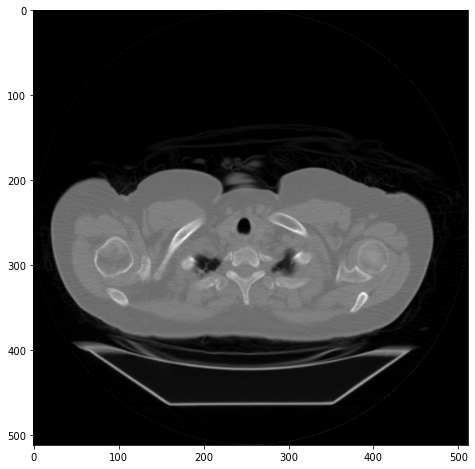

In [11]:
# Draw the image in grayscale
plt.imshow(im, cmap='gray')

# Render the image
plt.show()

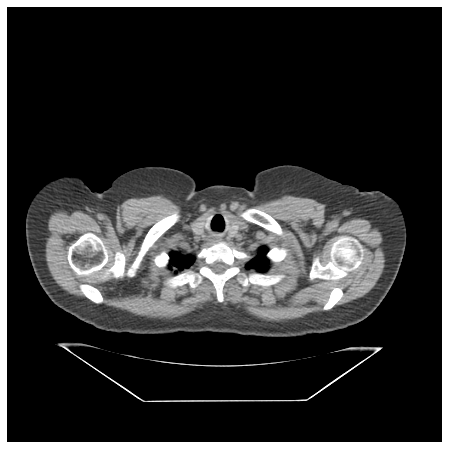

In [12]:
# Draw the image with greater contrast
plt.imshow(im, vmin=-200, vmax=200, cmap='gray')
plt.axis('off')
# Render the image
plt.show()

## N-dimensional images
* Now that we've loaded and plotted 2-D images, let's discuss higher dimensional datasets.
* Images come in all shapes and sizes, making them versatile, but also complex.
* A standard grayscale image is the simplest type of image: it's and array that can be indexed by rows and columns: `im[row, col]`

#### 3D images
* **3D images cover a volume of space, rather than just a single plane:**
    * **`vol[pln, row, col]`**
* This volumetric data is useful because it can better capture the complexities of the human body, but it can be difficult to visualize because it can't be summarized in a single plot.

#### Color images
* Color images are also three-dimensional
* RGB images, for example, have three color channels that, when rendered by `matplotlib` or other image viewers, express a wide range of colors.

#### Time series data (movies)
* **Movies, or time series data include a temporal dimension, show how each element changes over time:** 
    * **`im_ts[time, row, col, ch]`**
* Like the planar dimension for 3D volumes, the temporal dimension is put first by convention.

## N-dimensional images are stacks of arrays 
* Just as a 2D image is a stack of 1-dimensional vectors, **3D, 4D, and even higher dimensional images can be thought of as stacks of simpler ones.**

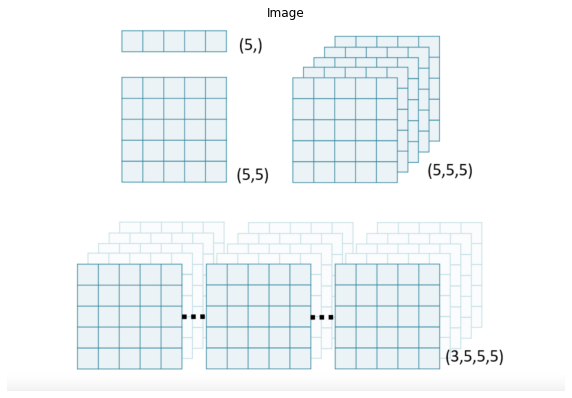

In [13]:
stacked_arrays = imread('pics_b/stacked_arrays_im.png')
show_image(stacked_arrays)

* Shape, sampling and field of view
    * Image shape: number of elements along each axis
    * Sampling rate: physical space covered by each element
    * Field of view: physical space covered along each axis
* **Image stacks:** Image "stacks" are a useful metaphor for understanding multi-dimensional data. Each higher dimension is a stack of lower dimensional arrays.

```
import imageio
import numpy as np
im1 = imageio.imread('chest-000.dcm')
im2 = imageio.imread('chest-001.dcm')
im3 = imageio.imread('chest-002.dcm')
im1.shape
```
* `(512, 512)`

```
vol = np.stack([im1, im2, im3])
vol.shape
```
* `(3, 512, 512)`

* If we look at our new `vol` array, we see that it contains a third dimension with three elements along it, but the row and column dimensions are the same as before.

#### Loading volumes directly
* **`imageio.volread()`:**
* Reads multi-dimensional data directly from disk, whether your images are stored in their own folder, or if the dataset is already multi-dimensional.
* Assembles a volumne from multiple images


In the following example, we have a folder named `chest-data`, which contains 50 slices of a 3D volumne:

```
import os
os.listdir('chest-data')
```
* output:

```
['chest-000.dcm',
'chest-001.dcm',
'chest-002.dcm',
...,
'chest-049.dcm']
```
* We simply have to pass the folder name to `volread()`, and it will assemble the volume for us.

```
import imageio
vol = imageio.volread('chest-data')
```
* **Since these are DICOM images, the function actually checks the available metadata to make sure that the images are placed in the correct order!**
    * Otherwise, it will default to **alphabetical order.**

```
vol.shape
```
`output:`

```
(50, 512, 512)
```
* Displaying the shape attribute shows us that we have 50 images stacked together 

### Shape, sampling, and field of view
* When analyzing images, keep in mind that the data is only a representation of real, physical space.
* The information in your images is limited to the number of elements in it: this is known as the **array shape** in NumPy and is always available as an attribute
* **Image shape:** number of elements along each axis.
* **Sampling rate:** the amount of physical space covered by each element; can vary along each dimension
    * For DICOM images, the sampling rate is usually encoded in the metadata
    * For other types of formats such as JPEG and PNG, you may need to find it elsewhere.
* **Field of view:** Physical space covered along each axis
    * It is the product of the shape and sampling rate

#### Image shape
```
import imageio
vol = imageio.volread('chest-data')

# Image shape (in voxels)
n0, n1, n2 = vol.shape
print(n0, n1, n2)
```
* Output: `(50, 512, 512)`

#### Sampling rate
```
# Sampling rate (in mm)
d0, d1, d2 = vol.meta['sampling']
d0, d1, d2
```
* Output: `(2, 0.5, 0.5)`

#### Field of view

```
#Field of view (in mm)
n0 * d0, n1 * d1, n2 * d2
```
* Output: `(100, 256, 256)`

#### Stack images
Image "stacks" are a useful metaphor for understanding multi-dimensional data. Each higher dimension is a stack of lower dimensional arrays.

In this exercise, we will use NumPy's `stack()` function to combine several 2D arrays into a 3D volume. [By convention](https://scikit-image.org/docs/dev/user_guide/numpy_images.html#numpy-images-coordinate-conventions), volumetric data should be stacked along the first dimension: `vol[plane, row, col]`.

Note: performing any operations on an ImageIO `Image` object will convert it to a `numpy.ndarray`, stripping its metadata.



In [14]:
# Import ImageIO and NumPy
#import imageio
#import numpy as np

# Read in each 2D image
im1 = imageio.imread('tcia-chest-ct-sample/chest-220.dcm')
im2 = imageio.imread('tcia-chest-ct-sample/chest-221.dcm')
im3 = imageio.imread('tcia-chest-ct-sample/chest-222.dcm')

# Stack images into a volume
vol = np.stack([im1, im2, im3], axis=0)
print('Volume dimensions:', vol.shape)

Volume dimensions: (3, 512, 512)


### Load volumes
ImageIO's `volread()` function can load multi-dimensional datasets and create 3D volumes from a folder of images. It can also aggregate metadata across these multiple images.

For this exercise, read in an entire volume of brain data from the `"tcia-chest-ct" `folder, which contains 25 DICOM images.

```
import imageio

# Load the "tcia-chest-ct" directory
vol = imageio.volread("tcia-chest-ct")

# Print image attributes
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)
```

In [15]:
#import imageio

# Load the "tcia-chest-ct" directory
vol = imageio.volread("tcia-chest-ct-sample")

# Print image attributes
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)

Reading DICOM (examining files): 1/5 files (20.0%5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)
Available metadata: odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])
Shape of image array: (5, 512, 512)


### Field of view
The amount of physical space covered by an image is its **field of view**, which is calculated from two properties:

* **Array shape** the number of data elements on each axis. Can be accessed with the `shape` attribute.
* **Sampling resolution** the amount of physical space covered by each pixel. Sometimes available in metadata (e.g., `meta['sampling']`).

For this exercise, multiply the array shape and sampling resolution along each axis to calculate the field of view of `vol`. All values are in millimeters.

In [16]:
array_shape = vol.shape

In [17]:
print(vol.shape)

(5, 512, 512)


In [18]:
sampling_rate = vol.meta.sampling

In [19]:
print(vol.meta['sampling'])

(3.269999999999996, 0.976562, 0.976562)


In [20]:
print(vol.meta.sampling)

(3.269999999999996, 0.976562, 0.976562)


In [21]:
print(array_shape[0] * sampling_rate[0], array_shape[1] * sampling_rate[1], array_shape[2] * sampling_rate[2])

16.34999999999998 499.999744 499.999744


**ANSWER:** The field of view is (16, 500, 500)

## Advanced Plotting
* Efficiently and comprehensively visualizing your data is key to successful image analysis.

#### To plot N-dimensional data, slice it!
* Similar to slicing a 3-D loaf of bread into 2-D (ish) planes.
* The concept for 3-D images is the same: to explore your multidimensional array, you must visualize many simpler slices of it

#### Plotting multiple images at once
* It's inefficient to plot each of these slices one by one
* A better way is to display many at once.
* To do this, we'll leverage pyplot's `subplots()` function, which creates a grid of axis objectts based on the number of rows and columns you specify
* **`plt.subplots`:** creates a figure canvas with multiple `AxesSubplots` objects
* When you call `pyplot.subplots()`, it returns a figure object and an array of axis handles

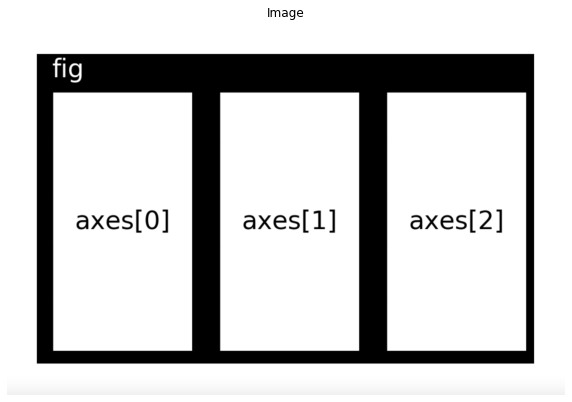

In [22]:
show_image(imread('pics_b/fig_ax_image.png'))

* In the case below, the axes array has a shape of 1 by 3
* To draw images on each subplot, we will call the `imshow()` function directly from the axis object, rather than calling it through `pyplot`.
* Here, we're plotting the first slice of vol with a gray colormap
* After the first slice is drawn, we repeat the process for the other slices
    * **If you had many images to draw, you could also inster the drawing step into a for loop as well.**
* Finally, we can clean up and render the figure (turn off tick and labels with `plt.axis('off')`

```
import imageio
vol = imageio.volread('chest-data')
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].imshow(vol[0], cmap= 'gray')
axes[1].imshow(vol[10], cmap='gray')
axes[2].imshow(vol[20], cmap='gray')
for ax in axes:
    ax.axis('off')
plt.show()
```
* We finish by rendering the sequence of images with `plt.show()` and are greeted with a nice set of images that move sequentially through the chest volume.

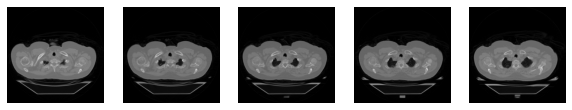

In [23]:
#import imageio
#vol = imageio.volread('chest-data')
fig, axes = plt.subplots(nrows=1, ncols=5)
axes[0].imshow(vol[0], cmap= 'gray')
axes[1].imshow(vol[1], cmap='gray')
axes[2].imshow(vol[2], cmap='gray')
axes[3].imshow(vol[3], cmap='gray')
axes[4].imshow(vol[4], cmap='gray')
for ax in axes:
    ax.axis('off')
plt.show()

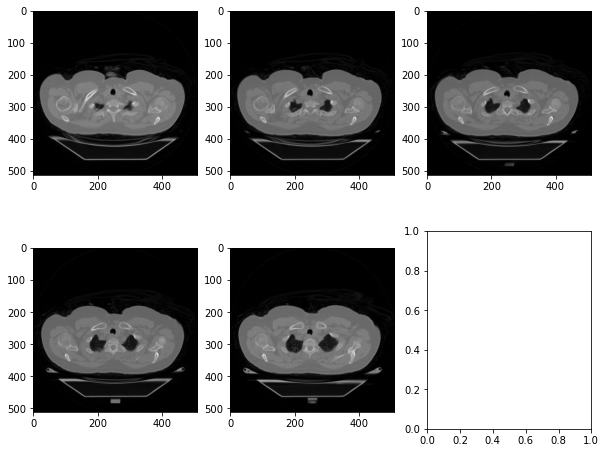

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=3)
axes[0,0].imshow(vol[0], cmap= 'gray')
axes[0,1].imshow(vol[1], cmap='gray')
axes[0,2].imshow(vol[2], cmap='gray')
axes[1,0].imshow(vol[3], cmap='gray')
axes[1,1].imshow(vol[4], cmap='gray')
#for ax in axes:
    #ax.axis('off')
plt.show()

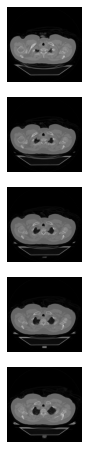

In [25]:
fig, axes = plt.subplots(nrows=5, ncols=1)
axes[0].imshow(vol[0], cmap= 'gray')
axes[1].imshow(vol[1], cmap='gray')
axes[2].imshow(vol[2], cmap='gray')
axes[3].imshow(vol[3], cmap='gray')
axes[4].imshow(vol[4], cmap='gray')
for ax in axes:
    ax.axis('off')
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].imshow(vol[0], cmap= 'gray')
axes[1].imshow(vol[2], cmap='gray')
axes[2].imshow(vol[4], cmap='gray')
for ax in axes:
    ax.axis('off')
plt.show()

### Non-standard views
* There are multiple ways you can slice a 3D volume into 2D images
* The simplest way is to choose a frame along the first dimension and plot the second and third against each other

#### Axial

```
import imageio

vol = imageio.volread('chest-data')
view_1v2 = vol[pln, :, :]
view_1v2 = vol[pln]
```

#### Coronal
* **If you instead seleceted a slice along the row dimension, you would get a second perspective
* In this case we are plotting front side of body to back side of body, rather than head to toe.

```
import imageio

vol = imageio.volread('chest-data')
view_1v2 = vol[pln, :, :]
view_1v2 = vol[pln]
view_0v2 = vol[:, row, :]
```

#### Sagittal
* Finally, you could plot the first and second axes against each other, yielding a third view
* Left side of body through to right side of body

```
import imageio

vol = imageio.volread('chest-data')
view_1v2 = vol[pln, :, :]
view_1v2 = vol[pln]
view_0v2 = vol[:, row, :]
view_0v1 = vol[:, :, col]
```

When looking at human anatomy, these different views have special names: the **axial**, **coronal**, and **sagittal** planes.

Knowing in which plane a dataset is stacked can help you navigate more efficiently.

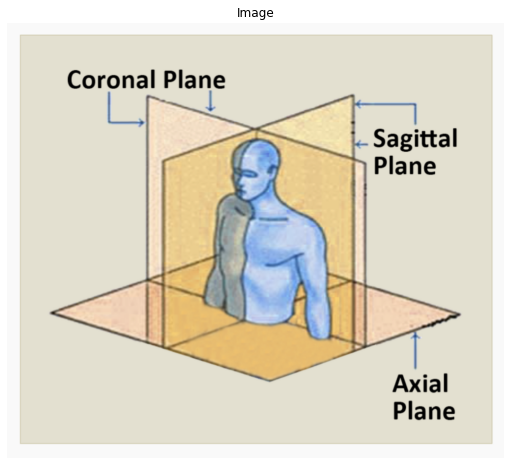

In [26]:
show_image(imread('pics_b/anatomical_views_01.png'))

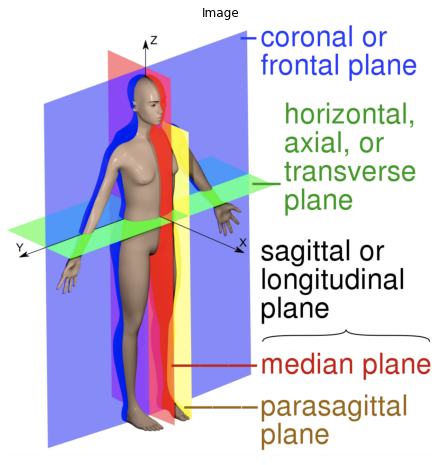

In [27]:
show_image(imread('pics_b/anatomical_views_03.png'))

#### Modifying the aspect ratio
* **Many datasets do not have equal sampling rates across all dimensions**
* In these cases, you will want to stretch the pixels along one side to account for the differences

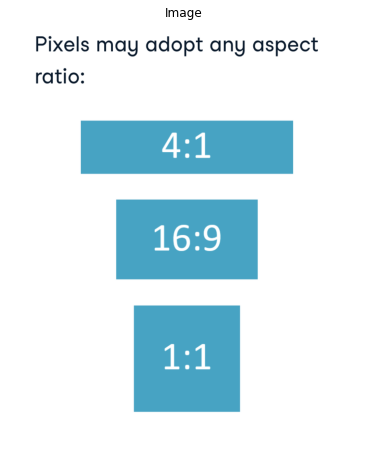

In [28]:
show_image(imread('pics_b/aspect_ratio_ct_scans.png'))

The amount of stretching needed is determined by the aspect ratio

Below, we've decided to plot a slice with data from the first and second dimensions:

```
im = vol[:, : , 100]
d0, d1, d2 = vol.meta['sampling']
d0, d1, d2
```
* output: `(2, 0.5, 0.5)`

* To determine the aspect ratio, we first get the sampling rates along each dimension from the metadata dictionary
* Then, we divide the sampling rate of the first dimension by the sampling rate of the second:

```
asp = d0 / d1
asp
```
* output: `3`

When we call `imshow()`, we pass this ratio to the aspect argument

```
plt.imshow(im, cmap='gray', aspect = asp)
plt.show()
```
* This results in a properly proportioned image
* Failing to adjust the aspect would have resulted in a distorted image

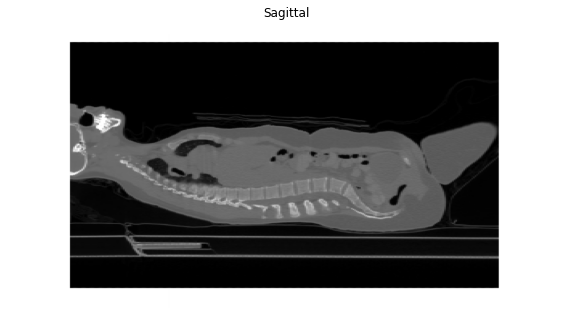

In [29]:
show_image(imread('pics_b/sagittal_ct.png'), "Sagittal")

### Exercises

#### Generate subplots
You can draw multiple images in one figure to explore data quickly. Use `plt.subplots()` to generate an array of subplots.
* `fig, axes = plt.subplots(nrows=2, ncols=2)`

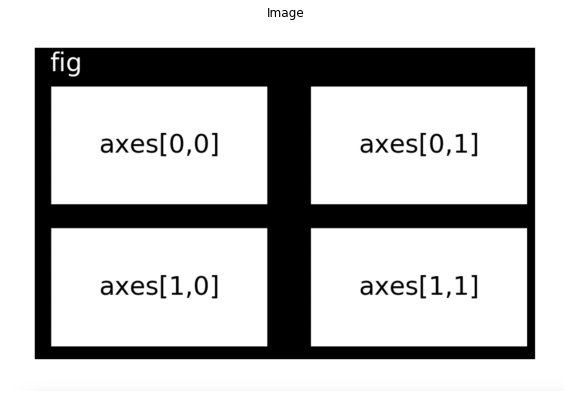

In [30]:
show_image(imread('pics_b/subplots2.png'))

To draw an image on a subplot, call the plotting method directly from the subplot object rather than through PyPlot: `axes[0,0].imshow(im)` rather than `plt.imshow(im)`.

For this exercise, draw `im1` and `im2` on separate subplots within the same figure.

```
# Import PyPlot
import matplotlib.pyplot as plt

# Initialize figure and axes grid
fig, axes = plt.subplots(nrows=2, ncols=1)

# Draw an image on each subplot
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')

# Remove ticks/labels and render
axes[0].axis('off')
axes[1].axis('off')
plt.show()
```

#### Slice 3D images
The simplest way to plot 3D and 4D images by slicing them into many 2D frames. Plotting many slices sequentially can create a "fly-through" effect that helps you understand the image as a whole.

To select a 2D frame, pick a frame for the first axis and select all data from the remaining two: `vol[0, :, :]`

For this exercise, use `for` loop to plot every 40th slice of `vol` on a separate subplot. `matplotlib.pyplot` (as `plt`) has been imported for you.

#### Looping through many images and plotting subplots

```
# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=1, ncols=4)

# Loop through subplots and draw image
for ii in range(4):
    im = vol[ii * 40, :, :]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')

# Render the figure
plt.show()
```

### Plot other views
Any two dimensions of an array can form an image, and slicing along different axes can provide a useful perspective. However, unequal sampling rates can create distorted images.

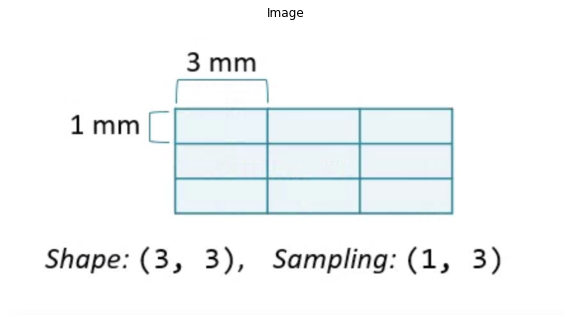

In [31]:
show_image(imread('pics_b/plot_other_views.png'))

Changing the *aspect* ratio can address this by increasing the width of one of the dimensions.

For this exercise, plot images that slice along the second and third dimensions of `vol`. Explicitly set the aspect ratio to generate undistorted images.

* Slice a 2D plane from `vol` where "axis 1" is `256`.
* Slice a 2D plane from `vol` where "axis 2" is `256`.
* For each image, calculate the aspect ratio by dividing the image "sampling" rate for axis 0 by its opponent axis. This information is in `vol.meta`.
* Plot the images in a subplots array. Specify the `aspect` ratio for each image, and set `cmap='gray'`.

```
# Select frame from "vol"
im1 = vol[:, 256, :]
im2 = vol[:, :, 256]

# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
asp1 = d0 / d2
asp2 = d0 / d1

# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(im1, cmap='gray', aspect = asp1)
axes[1].imshow(im2, cmap='gray', aspect = asp2)
plt.show()
```

![Axial CT gif](https://goodboychan.github.io/images/copied_from_nb/image/Ch1_L3_Axial16x9.gif "Axial")

See this [Stack Overflow](https://stackoverflow.com/questions/51527868/how-do-i-embed-a-gif-in-jupyter-notebook) for troubleshooting with embedding a gif in a jupyter notebook. 

# $\star$ Chapter 2: Masks and Filters
Cut image processing to the bone by transforming x-ray images. You'll learn how to exploit intensity patterns to select sub-regions of an array, and you'll use convolutional filters to detect interesting features. You'll also use SciPy's ndimage module, which contains a treasure trove of image processing tools.

## Intensity Values
* In this chapter, we'll discuss **masks** and **filters**, two techniques that emphasize important features in images. 
* To leverage them well, you must have a thorough understanding of your data's **distribution of intensity values**.

### Pixels and voxels
* The building blocks of medical images are **pixels** and **voxels**.
* **Pixels** are 2D picture elements
* **Voxels** are 3D volume elements
* Each of these elements has **two properties**:
    * An **intensity value**
    * A **location in space**
    
The meaning of the intensity value depends on the imaging modality. For example, pixels in a typical X-ray image (or, **radiograph**) are brighter in dense tissue such as bone, because it absorbs more radiation that other types.

### Data types and image size
* The range of values allowed in an image is determined by its data type

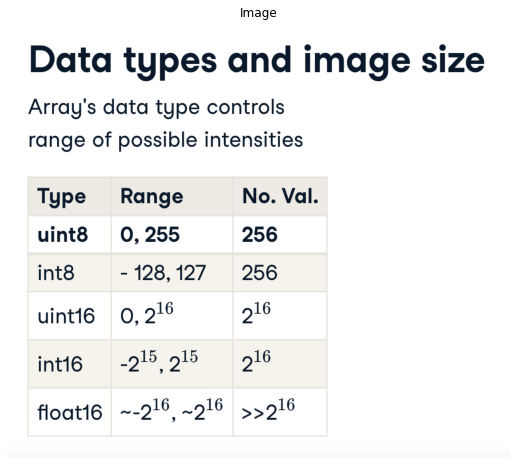

In [32]:
show_image(imread('pics_b/dtypes_image_size.png'))

* Generally, **lower-bit integers are preferred for images, since memory usage increases dramatically for larger data types.**
* If all values in the image are positive, then unsigned integers can cover the widest range of values while taking up the least amount of memory.
* You will commonly see images scaled by the value 255, which is the maximum value for 8-bit unsigned integers.
* You can see the difference in memory usage by calling the `size` attribute of the array:

```
import imageio

im = imageio.imread('foot-xray.jpg')

im.dtype('uint8')
```

In [33]:
im = imageio.imread('pics_b/chest_01.png')
im.dtype

dtype('uint8')

In [34]:
im.size

6200096

* The image above (`chest_01.png`) is read by `imageio` as an **8-bit unsigned integer**. 
* It takes up about **6200 kB** kilobytes.
* If we convert it to a 64-bit integer, however, the same information now takes up more than a megabyte of space:

```
im_int64 = im.astype(np.uint64)
im_int64.size
```

### Histograms
* Histograms summarize the distribution of intensity values in an image.
* Histograms bin each pixel by its value and then count each bin
* Histograms count number of pixels at each intensity level 
* `scipy`, and especially its `ndimage` module, contain some essential tools for image analysis
    * **`scipy.ndimage`**:
        * higher-dimensional arrays
        * masked data
    * Advanced techniques and functionality in **`scikit-image`**
    
* To generate a histogram for an image, we first **import `scipy.ndimage` as `ndi`**

```
import scipy.ndimage as ndi
hist = ndi.histogram(im, 
                     min= 0, 
                     max= 255, 
                     bins= 256)
```

* To generate a histogram for the foot x-ray, we first import SciPy's Ndimage module as `ndi`.
* Then we call `ndi.histogram` and pass in our array
* The `histogram` function requires us to specify values for the minimum (`min`), maximum (`max`), and the number of bins (`bins`)
* **Since our image is an 8-bit unsigned integer, our range is from 0 to 255, with 256 possible values.**
* This returns a 256 element vector with the count of pixels at each intensity value 

In [35]:
foot_xray = imageio.imread('pics_b/foot_xray.png')
#show_image(foot_xray, "Foot X-ray")
foot_xray.dtype

dtype('uint8')

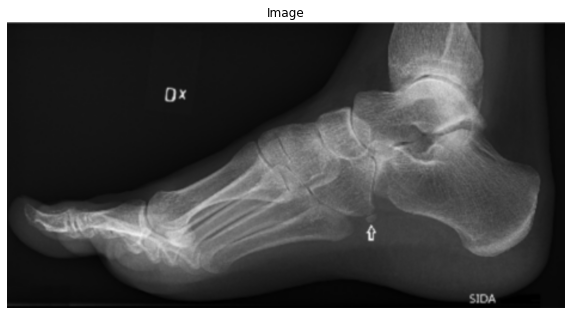

In [36]:
show_image(foot_xray)

In [37]:
hist = ndi.histogram(foot_xray,
                     min = 0,
                     max = 255,
                     bins = 256)
hist.shape

(256,)

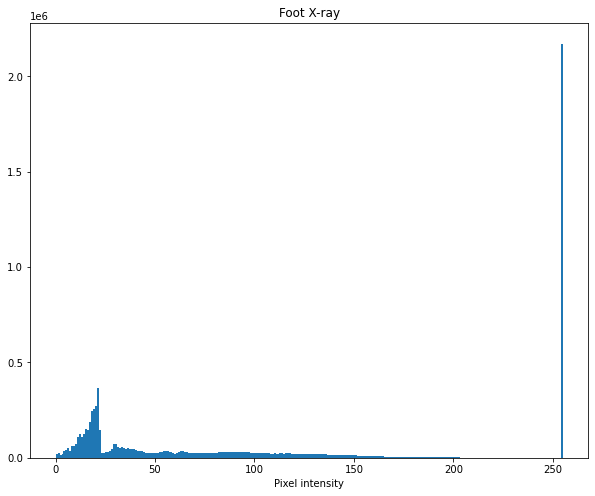

In [38]:
plt.hist(foot_xray.ravel(), bins=256)
plt.title('Foot X-ray')
plt.xlabel('Pixel intensity')
plt.show()

* **Since our image is an 8-bit unsigned integer, our range is from 0 to 255, with 256 possible values.**
* This returns a 256 element vector with the count of pixels at each intensity value 
* Plotting the data as a line plot reveals a highly skewed distribution, with many low values and a wider range of high values

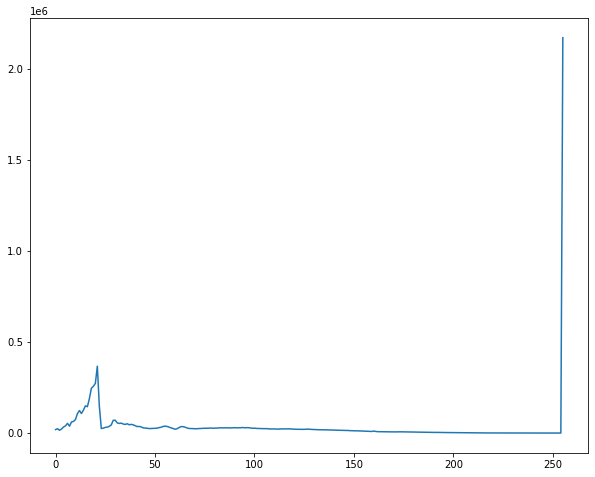

In [39]:
plt.plot(hist)
plt.show()

## Equalization
* Skewed distributions are common in medical images: bakcground intensities are usually low, and take up a lot of image space.
* **Medical images: distributions often skewed toward low intensities (background values).**
* **Histogram equalization** redistributes values to optimize full intensity range
* **Cumultive distribution (CDF)::** shows proportion of pixels in range

#### Equalization
* First, generate the histogram
* Then, calculate the cumulative distribution function by taking the rolling sum of the histogram and dividing it by the total number of pixels

```
# import scipy.ndimage as ndi
hist = ndi.histogram(im, min = 0, max = 255, bins = 256)
cdf = hist.cumsum() / hist.sum()
cdf.shape
```

In [40]:
cdf = hist.cumsum() / hist.sum()
cdf.shape

(256,)

* Then, we apply the function to our image and rescale by 255


```
im_equalized = cdf[im] *255
fig, axes = plt.subplots(2, 1)
axes[0].imshow(im)
axes[1].imshow(im_equalized)
plt.show()
```

See this [Stack Overflow](https://stackoverflow.com/questions/10873824/how-to-convert-2d-float-numpy-array-to-2d-int-numpy-array) for conversion from numpy float array to numpy integer array

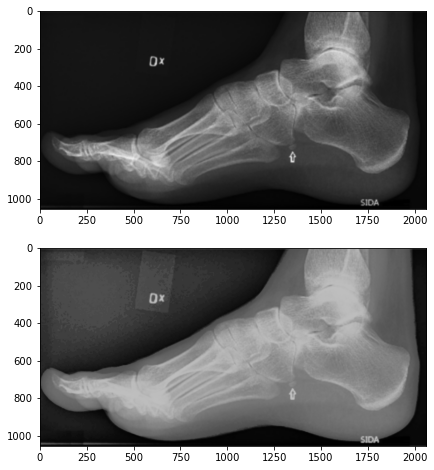

In [42]:
foot_equalized = (cdf[foot_xray] *255).astype(int)
fig, axes = plt.subplots(2, 1)
axes[0].imshow(foot_xray)
axes[1].imshow(foot_equalized)
plt.show()

In [43]:
foot_equalized

array([[[185, 185, 185, 255],
        [185, 185, 185, 255],
        [184, 184, 184, 255],
        ...,
        [183, 183, 183, 255],
        [184, 184, 184, 255],
        [184, 184, 184, 255]],

       [[173, 173, 173, 255],
        [171, 171, 171, 255],
        [170, 170, 170, 255],
        ...,
        [168, 168, 168, 255],
        [168, 168, 168, 255],
        [169, 169, 169, 255]],

       [[154, 154, 154, 255],
        [152, 152, 152, 255],
        [150, 150, 150, 255],
        ...,
        [146, 146, 146, 255],
        [147, 147, 147, 255],
        [148, 148, 148, 255]],

       ...,

       [[ 19,  19,  19, 255],
        [  7,   7,   7, 255],
        [  2,   2,   2, 255],
        ...,
        [  7,   7,   7, 255],
        [  8,   8,   8, 255],
        [ 16,  16,  16, 255]],

       [[ 16,  16,  16, 255],
        [  6,   6,   6, 255],
        [  1,   1,   1, 255],
        ...,
        [  8,   8,   8, 255],
        [ 10,  10,  10, 255],
        [ 19,  19,  19, 255]],

       [[ 82

* This has made the foot stand out more clearly, but it has also given extra weight to some background areas
* **For biomedical applications, global equalization (such as this) should be done with caution, but the principle of redistributing intensity values is a useful one to keep in mind.**

## Intensity
In this chapter, we will work with a hand [radiograph](https://en.wikipedia.org/wiki/Radiography) from a 2017 Radiological Society of North America competition. X-ray absorption is highest in dense tissue such as bone, so the resulting intensities should be high. Consequently, images like this can be used to predict "bone age" in children.

To start, let's load the image and check its intensity range.

The image datatype determines the range of possible intensities: e.g., 8-bit unsigned integers (`uint8`) can take values in the range of 0 to 255. A colorbar can be helpful for connecting these values to the visualized image.

All exercises in this chapter have the following imports:

```
import imageio
import numpy as np
import matplotlib.pyplot as plt
```

Reminder:

```
def format_and_render_plot():
    '''Custom function to simplify common formatting operations for exercises. Operations include: 
    1. Turning off axis grids.
    2. Calling `plt.tight_layout` to improve subplot spacing.
    3. Calling `plt.show()` to render plot.'''
    fig = plt.gcf()
    for ax in fig.axes:
        ax.axis('off')    
    plt.tight_layout()
    plt.show()
```

In [44]:
hand_xray = imread('pics_b/hand_xray.jpg')

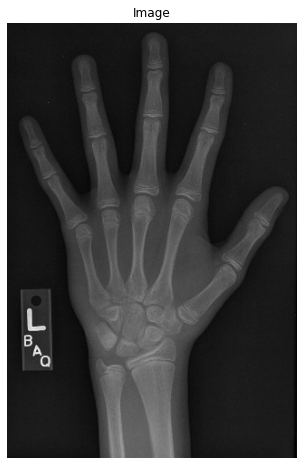

In [45]:
show_image(hand_xray)

In [46]:
print('Data type:', hand_xray.dtype)
print('Min. value:', hand_xray.min())
print('Max value:', hand_xray.max())

Data type: uint8
Min. value: 3
Max value: 224


In [47]:
hand_xray.shape

(480, 320)

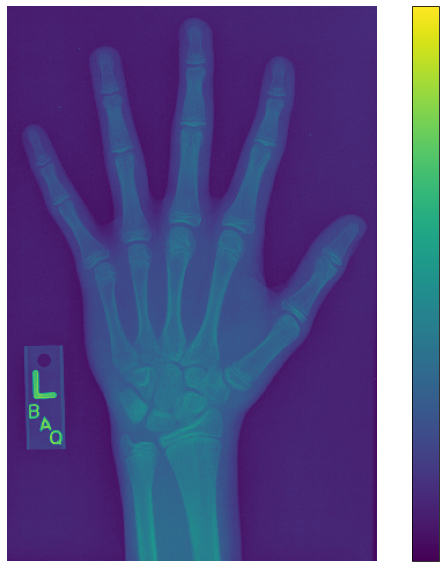

In [125]:
# Plot the grayscale image
plt.imshow(hand_xray, vmin=0, vmax=255)
plt.colorbar()
format_and_render_plot_1()

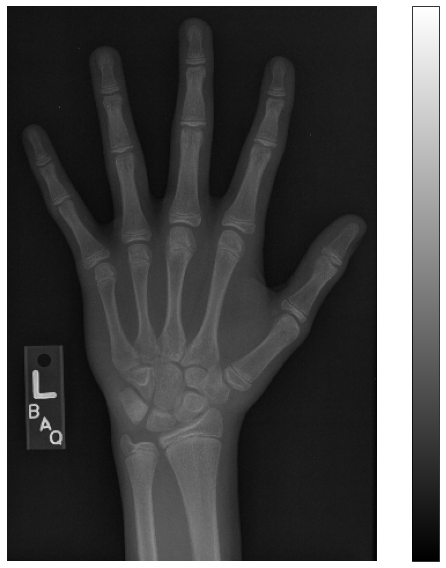

In [124]:
# Plot the grayscale image
plt.imshow(hand_xray, vmin=0, vmax=255, cmap='gray')
plt.colorbar()
format_and_render_plot_1()

## Histograms
**Histograms** display the distribution of values in your image by binning each element by its intensity then measuring the size of each bin.

The area under a histogram is called the **cumulative distribution function**. It measures the frequency with which a given range of pixel intensities occurs.

For this exercise, describe the intensity distribution in im by calculating the histogram and cumulative distribution function and displaying them together.

```
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi

# Create a histogram, binned at each possible value
hist = ndi.histogram(im, min=0, max=255, bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
format_and_render_plot()
```

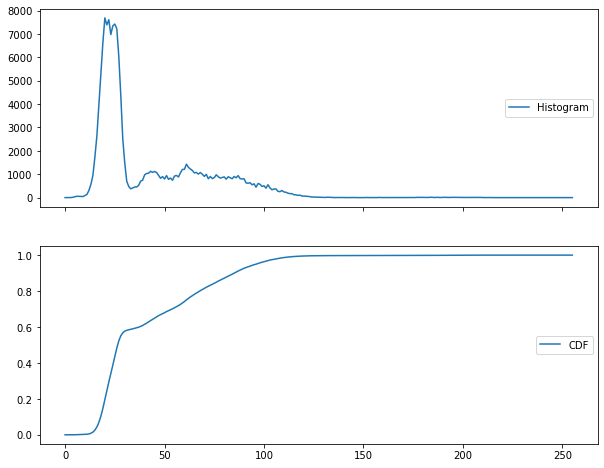

In [49]:
# import scipy.ndimage as ndi

hist = ndi.histogram(hand_xray, min = 0, max = 255, bins = 256)

cdf = hist.cumsum() / hist.sum()

fig, axes = plt.subplots(2, 1, sharex= True)
axes[0].plot(hist, label = 'Histogram')
axes[1].plot(cdf, label='CDF')
format_and_render_plot_2()

## Masks
* **You can restrict your analysis to only the most important parts of an image by creating and applying image masks.**
* A **mask** is a Boolean array which serves as a screen to remove undesirable pixels
* Masks must retain the same dimensions as the original image so that the two can be overlaid

#### Creating masks
* One way to create masks is to **find all the pixels in an image that satify a certain condition.**
* Logical operations result in `True` / `False` at each pixel

In [50]:
mat = np.array ([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])
mat > 5

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

* If we test for values greater than 5, we will return a 3 x 3 array where the values are `True` when they are greater than 5 and `False` when they are not greater than 5.
* Logical operations include comparisons and tests of equivalence ( `>`, `==`, `&`, `|`)
* You can also chain operations together to select a specific range of pixels

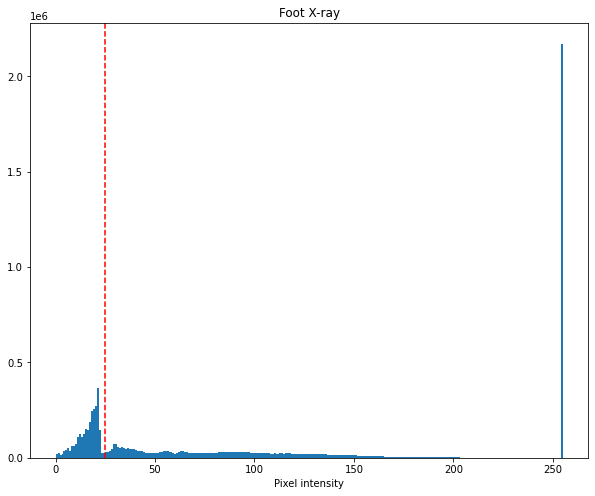

In [89]:
plt.hist(foot_xray.ravel(), bins=256)
plt.axvline(x=25, c='r', linestyle='--')
#plt.axvline(x=32, c='orange', linestyle='--')
plt.title('Foot X-ray')
plt.xlabel('Pixel intensity')
plt.show()

#### Foot X-ray
* Recal that the foot x-ray has an intensity distribution that is very skewed to the left. 
* We noticed that there is a steep drop-off around 32 (edit: here I used `25`), so let's select values greater than this. 

In [62]:
foot_xray.shape

(1054, 2060, 4)

In [81]:
mask1 = foot_xray > 25

In [82]:
mask1.dtype

dtype('bool')

In [83]:
mask1.shape

(1054, 2060, 4)

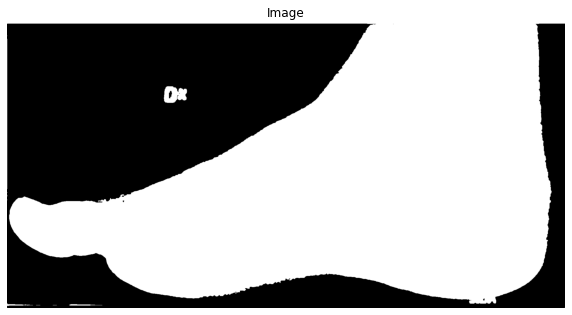

In [84]:
show_image(mask1.astype(float))

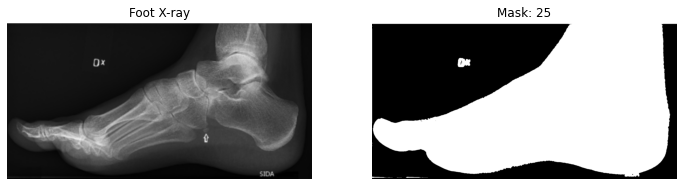

In [77]:
plot_comparison(foot_xray, "Foot X-ray", mask1.astype(float), "Mask: 25")

This seems to do quite a good job highlighting the foot.


#### Bone mask
**Bone** is the highest intensity tissue in an x-ray, and if we increase our threshold to 64, we create a rough bone mask.

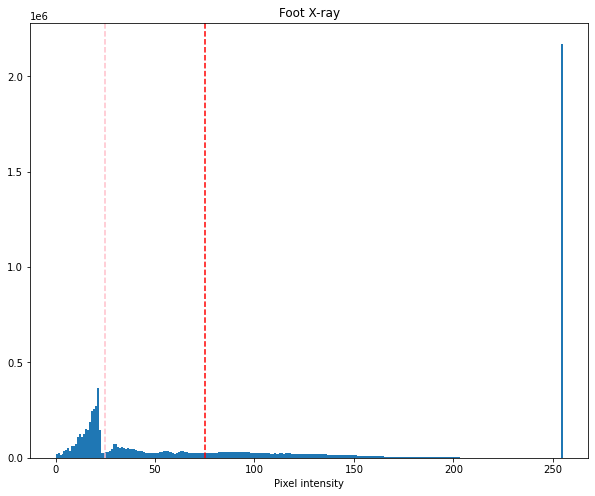

In [102]:
plt.hist(foot_xray.ravel(), bins=256)
plt.axvline(x=25, c='pink', linestyle='--')
plt.axvline(x=75, c='r', linestyle='--')
plt.title('Foot X-ray')
plt.xlabel('Pixel intensity')
plt.show()

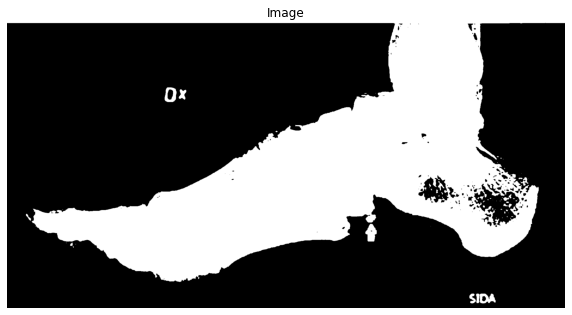

In [103]:
mask2 = foot_xray > 70
show_image(mask2.astype(float))

#### Non-bone mask
Finally, we can create a mask of non-bone tissue by finding pixels that are in mask 1, but not in mask 2.

In [116]:
mask3 = (mask1 & ~mask2)

In [123]:
mask3.dtype

dtype('bool')

In [141]:
#mmm = np.where(mask3, 1,0)
#plt.imshow(mmm, cmap='gray')
#plt.axis('off')
#plt.show()

In [142]:
#show_image(mask3.astype(float))

* The selected pixels are in the foot but not part of the bone. They seem to be related to skin and other tissue

## $\star$ Applying masks

* **`np.where(condition, x, y)`** : control what data passes through the mask
* Masks can be used to screen images, allowing the original values through, except where the mask evaluates to `False`
    * `np.where` is useful for this purpose
    * It applies a condition on each pixel, and instead of returning a Boolean, it returns `x` when `True` and `y` when `False`.
    * Each of the arguments can be either arrays or single values, allowing for great flexibility
    
* To see this in action, let's try to filter out pixels that are not part of the bone.
* We'll call `"where image is greater than 64, return im, otherwise return 0"`
* Plotting the masked image shows that only the high-intensity values remain, and those are mostly bone

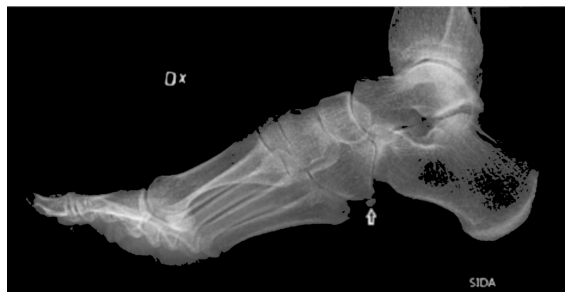

In [144]:
# import numpy as np
im_bone = np.where(foot_xray > 70, foot_xray, 0)
plt.imshow(im_bone, cmap='gray')
plt.axis('off')
plt.show()

* Plotting the masked image shows that only the high-intensity values remain, and these are mostly bone

### Tuning mask
* Data is **noisy**, so your masks will rarely be perfect.
* Fortunately, there are simple ways to improve them.
* To increases the size of your mask, you can add pixels around the edge, a process know as **dilation**
* **Dilation** can help when the edges are fuzzy or to make sure you don't accidentally mask out pixels you actually care about.
* The `ndi.binary_dilation` function converts all background pixels adjacent to the mask into mask pixels
* The opposite operation is `ndi.binary_erosion` and can be implemented in the same manner; use it to cut the mask down to its more central pixels
* `ndi.binary_dilation(m, iterations =5)`
* `ndi.binary_erosion(m, iterations =5)`
* You can perform these tuning operations many iterations to make your mask much larger or smaller.
* You can also combine the operations to open or close holes in your mask

## Exercises: Create a mask
**Masks** are the primary method for removing or selecting specific parts of an image. They are binary arrays that indicate whether a value should be included in an analysis. Typically, masks are created by applying one or more logical operations to an image.

For this exercise, try to use a simple intensity threshold to differentiate between skin and bone in the hand radiograph. (`im` has been equalized to utilize the whole intensity range.)

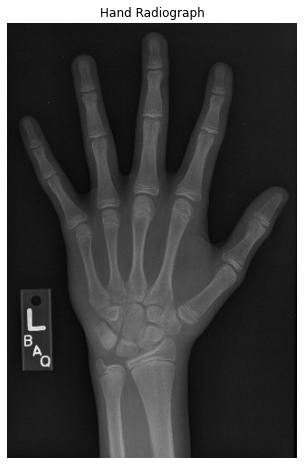

In [147]:
show_image(hand_xray, "Hand Radiograph")

In [148]:
hand_xray.shape

(480, 320)

In [149]:
hand_xray.min()

3

In [150]:
hand_xray.max()

224

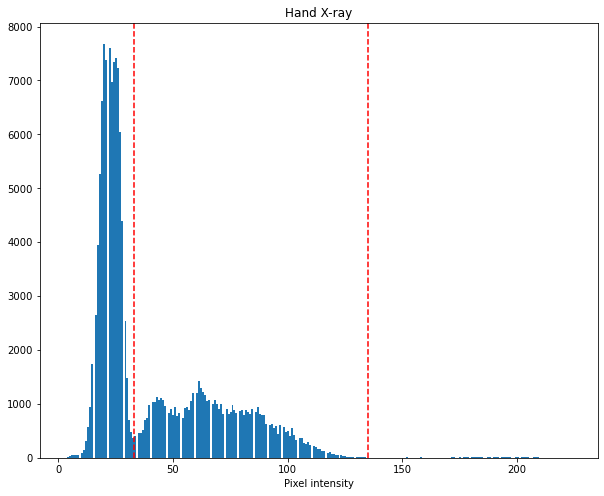

In [157]:
plt.hist(hand_xray.ravel(), bins=256)
plt.axvline(x=33, c='r', linestyle='--')
plt.axvline(x=135, c='r', linestyle='--')
plt.title('Hand X-ray')
plt.xlabel('Pixel intensity')
plt.show()

Create a bone mask for pixels with intensities greater than 135. Create a skin mask by selecting pixels with intensities greater than or equal to 33 and less than 135.

In [158]:
# Create skin and bone masks
mask_bone = im >= 135
mask_skin = (im >= 33) & (im < 135)

In [161]:
mask_bone.dtype

dtype('bool')

In [160]:
# Plot the skin (0) and bone (1) masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_skin, cmap='gray')
axes[1].imshow(mask_bone, cmap='gray')
format_and_render_plot1()

NameError: name 'format_and_render_plot1' is not defined

ValueError: Unsupported dtype

<Figure size 720x576 with 2 Axes>

In [163]:
plt.imshow(mask_bone, cmap='gray')

ValueError: Unsupported dtype

<Figure size 720x576 with 1 Axes>